## YouTube Trending Videos Analysis with Python

YouTube is the world’s most popular and widely used video platform today. In this task, I’m going to introduce you to a data science project on YouTube trending videos analysis with Python programming language.

### Data Science Project on Youtube Trending Videos Analysis with Python
- The dataset that I will be using for the analysis of Youtube trending videos was collected over 205 days. For each of those days, the dataset contains data on trending videos for that day. It contains data on over 40,000 trending videos.

- We will analyze the data to get insight on trending YouTube videos, to see what is common among all trending videos. This information can also be used by people who want to increase the popularity of their videos on YouTube.

- Now let’s get started with the task of Youtube trending videos analysis with Python by importing the necessary Python libraries:

## Goals of the analysis
#### We want to answer questions like:

- How many views do our trending videos have? Do most of them have a large number of views? Is having a large number of views required for a video to become trending?
- The same questions above, but applied to likes and comment count instead of views.
- Which video remained the most on the trendin-videos list?
- How many trending videos contain a fully-capitalized word in their titles?
- What are the lengths of trending video titles? Is this length related to the video becoming trendy?
- How are views, likes, dislikes, comment count, title length, and other attributes correlate with (relate to) each other? How are they connected?
- What are the most common words in trending video titles?
- Which YouTube channels have the largest number of trending videos?
- Which video category (e.g. Entertainment, Gaming, Comedy, etc.) has the largest number of trending videos?

#### Importing the necessary Libraries

In [1]:
## Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
from collections import Counter
import datetime
import wordcloud
import json

#### Loading the DataSet and viewing it

In [2]:
## Importing the dataset and checking it
df = pd.read_csv(r"C:\Users\lenovo\Desktop\USvideos.csv")
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


#### Now let’s set a few configuration options just to improve visualization plots:

In [3]:
df = pd.read_csv(r"C:\Users\lenovo\Desktop\USvideos.csv")
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

### Data Exploration

In [6]:
df.isnull().sum()

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

- The description column has some null values. These are some of the rows with null description values. So, to do some sort of data cleaning and to get rid of those null values, I’m going to put an empty string in place of each null value in the Description column:

In [7]:
## Converting or changing null values
df["description"] = df["description"].fillna(value="")

- Now let’s take a look at some statistical information about the numeric columns in our dataset:

In [8]:
## Lets check the details description of dataset
df.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.00,40949.00,40949.00,40949.00,40949.00
mean,19.97,2360784.64,74266.70,3711.40,8446.80
std,7.57,7394113.76,228885.34,29029.71,37430.49
min,1.00,549.00,0.00,0.00,0.00
25%,17.00,242329.00,5424.00,202.00,614.00
50%,24.00,681861.00,18091.00,631.00,1856.00
75%,25.00,1823157.00,55417.00,1938.00,5755.00
max,43.00,225211923.00,5613827.00,1674420.00,1361580.00


Observations from the above table:
    
- The average number of views of a trending video is 2,360,784. The median value of the number of views is 681,861, which means that half of the trending videos have less than this number and the other half have views greater than this number.
- The average number of likes for a trending video is 74,266, while the average number of likes is 3,711.
- The average number of comments is 8,446 while the median is 1,856.   

### Data Visualization

#### Dataset collection years
- Let's see in which years the dataset was collected

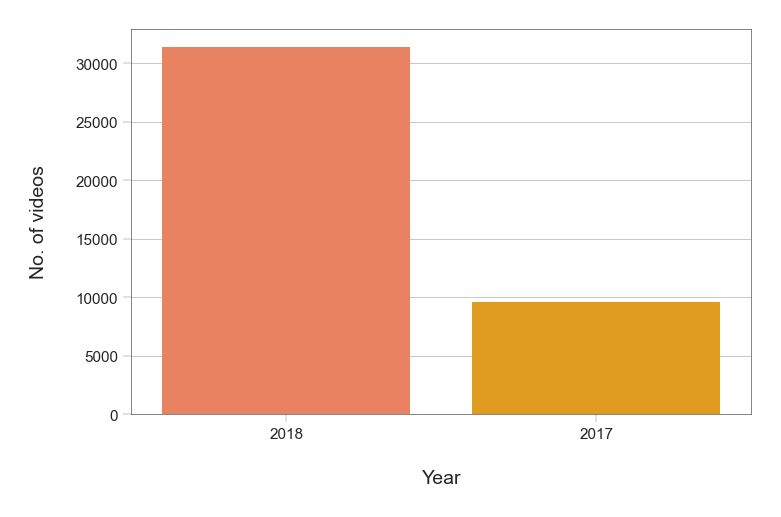

In [9]:
## Checking in which year the data was collected
cdf = df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts() \
            .to_frame().reset_index() \
            .rename(columns={"index": "year", "trending_date": "No_of_videos"})

fig, ax = plt.subplots()
_ = sns.barplot(x="year", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Year", ylabel="No. of videos")

In [10]:
## Converting the above values count in % format
df["trending_date"].apply(lambda x: '20' + x[:2]).value_counts(normalize=True)*100

2018   76.56
2017   23.44
Name: trending_date, dtype: float64

#### We can see that the dataset was collected in 2017 and 2018 with 76.56% of it in 2018 and 23.44% in 2017.

## Views histogram
- let's plot a histogram for the views column to take a look at its distribution: to see how many videos have between 10 million and 20 million views, how many videos have between 20 million and 30 million views, and so on.

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


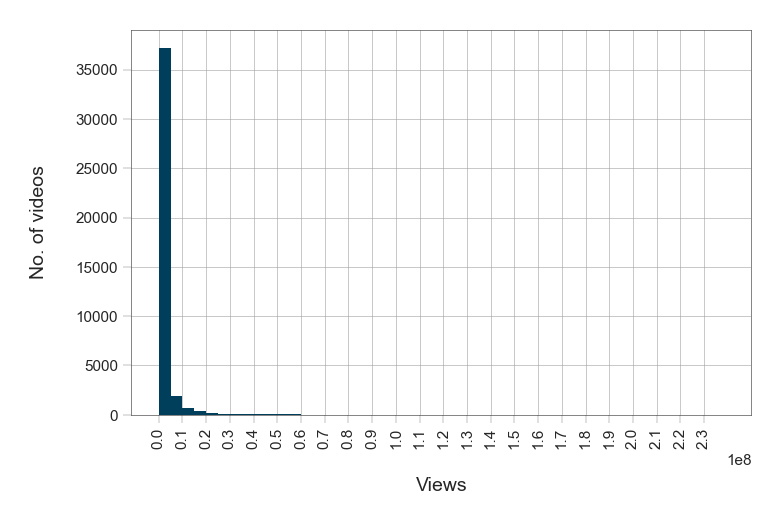

In [11]:
## plotting the histogram
fig, ax = plt.subplots()
_ = sns.distplot(df["views"], kde=False, color=PLOT_COLORS[4], 
                 hist_kws={'alpha': 1}, bins=np.linspace(0, 2.3e8, 47), ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos", xticks=np.arange(0, 2.4e8, 1e7))
_ = ax.set_xlim(right=2.5e8)
_ = plt.xticks(rotation=90)

- Now let us plot the histogram just for videos with 25 million views or less to get a closer look at the distribution of the data

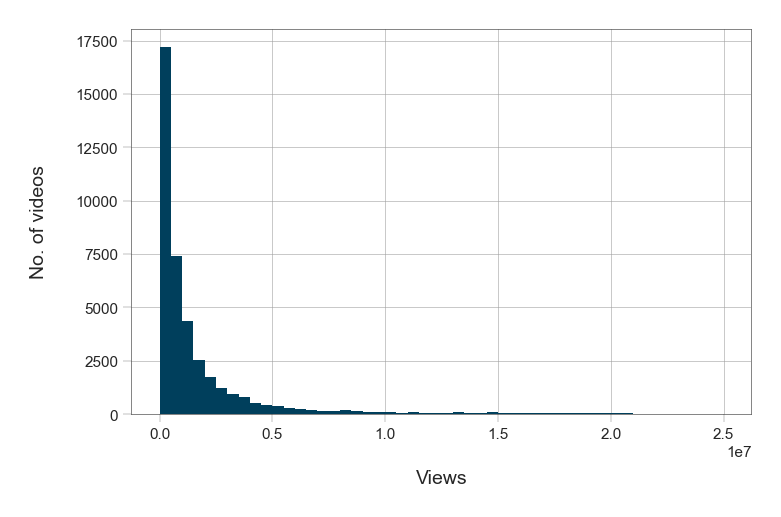

In [12]:
## Plotting the Histogram
fig, ax = plt.subplots()
_ = sns.distplot(df[df["views"] < 25e6]["views"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos")

- Now we see that the majority of trending videos have 1 million views or less. Let's see the exact percentage of videos less than 1 million views

In [13]:
## Counting the %
df[df['views'] < 1e6]['views'].count() / df['views'].count() * 100

60.09426359618062

#### So, it is around 60%. Similarly, we can see that the percentage of videos with less than 1.5 million views is around 71%, and that the percentage of videos with less than 5 million views is around 91%.

## Likes histogram
- After views, we plot the histogram for likes column

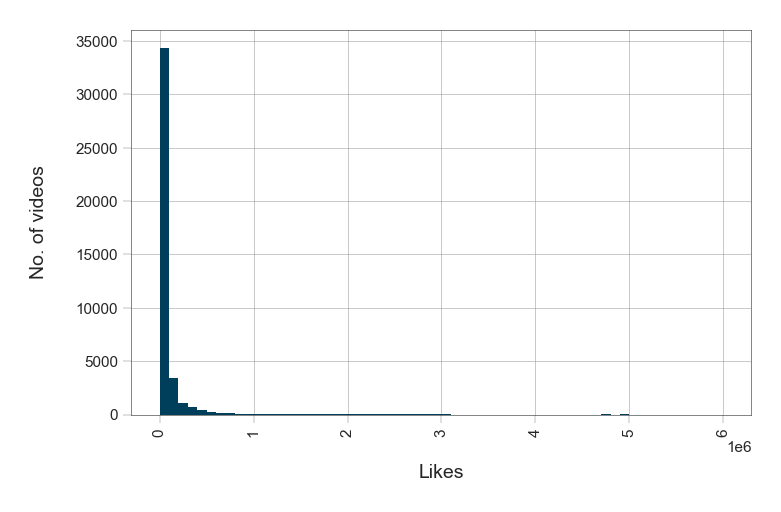

In [14]:
## Plotting the Histogram
plt.rc('figure.subplot', wspace=0.9)
fig, ax = plt.subplots()
_ = sns.distplot(df["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 6e6, 61), ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")
_ = plt.xticks(rotation=90)

- We note that the vast majority of trending videos have between 0 and 100,000 likes. 

- Let us plot the histogram just for videos with 1000,000 likes or less to get a closer look at the distribution of the data

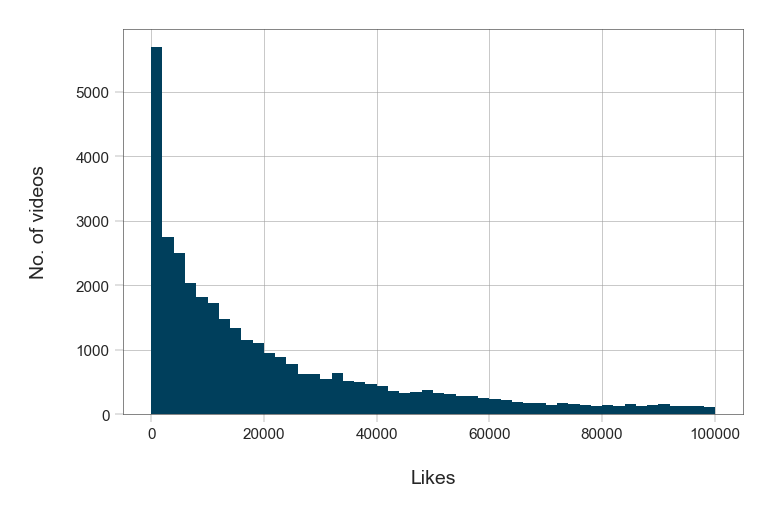

In [16]:
## Let us plot the histogram just for videos with 1000,000 likes or less to get a closer look at the distribution of the data
fig, ax = plt.subplots()
_ = sns.distplot(df[df["likes"] <= 1e5]["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")

- Now we can see that the majority of trending videos have 40000 likes or less with a peak for videos with 2000 likes or less.

#### Let's see the exact percentage of videos with less than 40000 likes

In [17]:
## Checking the exact percentage of videos with less than 40000 likes
df[df['likes'] < 4e4]['likes'].count() / df['likes'].count() * 100

68.4900730176561

- Similarly, we can see that the percentage of videos with less than 100,000 likes is around 84%

## Comment count histogram

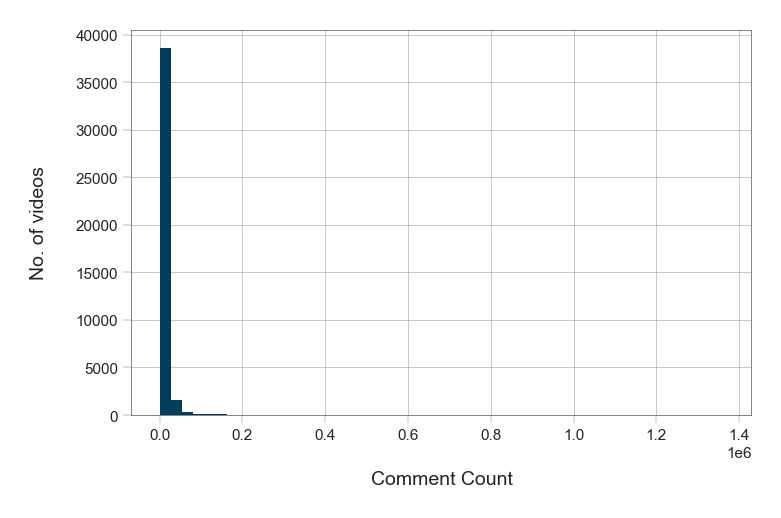

In [18]:
fig, ax = plt.subplots()
_ = sns.distplot(df["comment_count"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

- Let's get a closer look by eliminating entries with comment count larger than 200000 comment

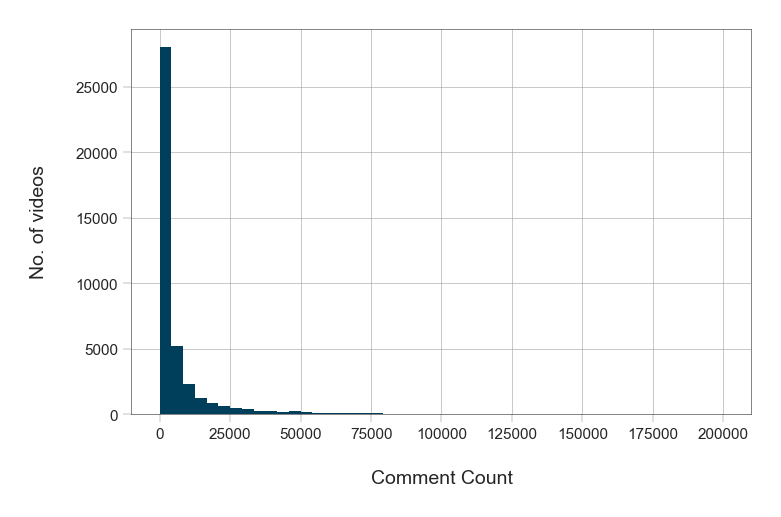

In [19]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["comment_count"] < 200000]["comment_count"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 2e5, 49), ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

#### As with views and likes, let's see the exact percentage of videos with less than 4000 comments

In [20]:
## Calculating the % of videos with less than 4000 comments
df[df['comment_count'] < 4000]['comment_count'].count() / df['comment_count'].count() * 100

67.48882756599673

#### In a similar way, we can see that the percentage of videos with less than 25,000 comments is around 93%.

### How many trending video titles contain capitalized word?
- Now we want to see how many trending video titles contain at least a capitalized word (e.g. HOW). To do that, we will add a new variable (column) to the dataset whose value is True if the video title has at least a capitalized word in it, and False otherwise

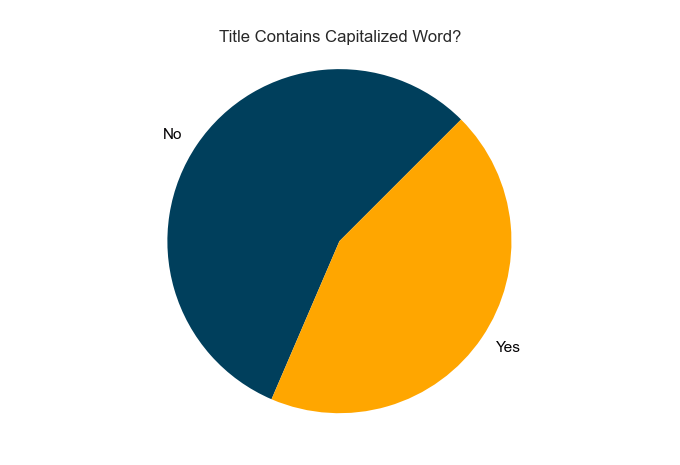

In [21]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?')

In [23]:
## Lets calculate thin in %
df["contains_capitalized"].value_counts(normalize=True)*100

False   56.04
True    43.96
Name: contains_capitalized, dtype: float64

- We can see that 44% of trending video titles contain at least a capitalized word. We will later use this added new column contains_capitalized in analyzing correlation between variables.

## Video title lengths

#### Let’s add another column to our dataset to analyze the length of titles of videos, then plot the title length histogram to get an idea of the length of trending video titles:

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


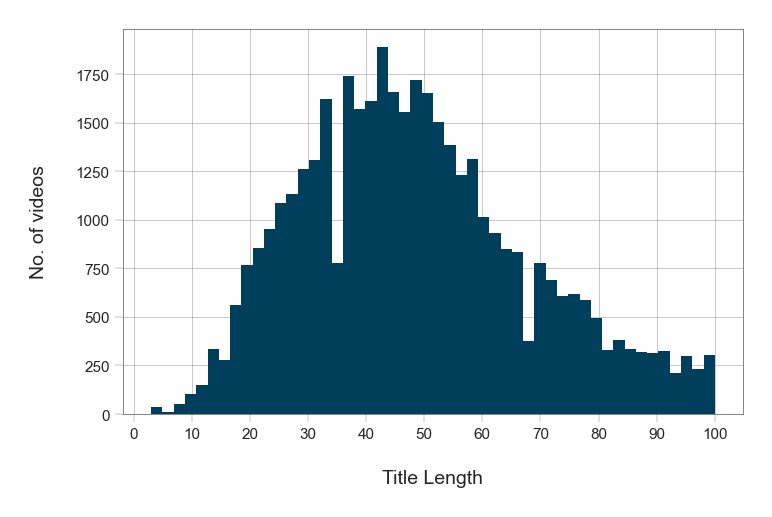

In [22]:
df["title_length"] = df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
_ = sns.distplot(df["title_length"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

- We can see that title-length distribution resembles a normal distribution, where most videos have title lengths between 30 and 60 character approximately.

#### Now let's draw a scatter plot between title length and number of views to see the relationship between these two variables

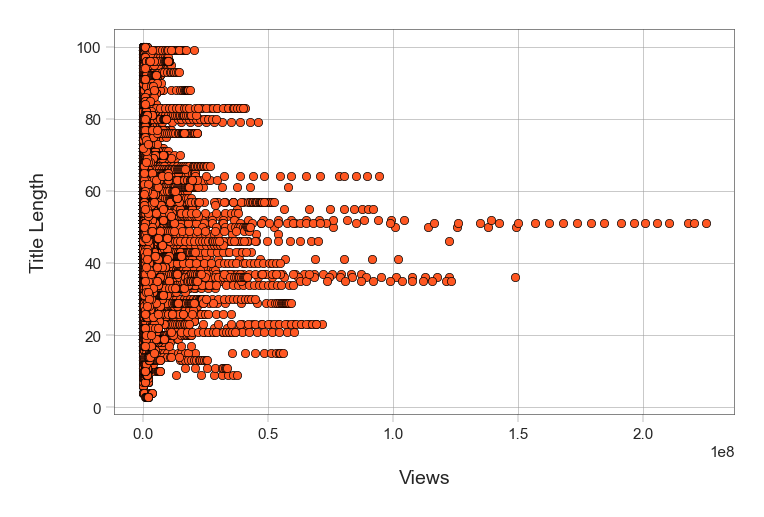

In [24]:
fig, ax = plt.subplots()
_ = ax.scatter(x=df['views'], y=df['title_length'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")

- By looking at the scatter plot, we can say that there is no relationship between the title length and the number of views. However, we notice an interesting thing: videos that have 100,000,000 views and more have title length between 33 and 55 characters approximately.

## Correlation between dataset variables
- Now let's see how the dataset variables are correlated with each other: for example, we would like to see how views and likes are correlated, meaning do views and likes increase and decrease together (positive correlation)? Does one of them increase when the other decrease and vice versa (negative correlation)? Or are they not correlated?

- Correlation is represented as a value between -1 and +1 where +1 denotes the highest positive correlation, -1 denotes the highest negative correlation, and 0 denotes that there is no correlation.

- Let's see the correlation table between our dataset variables (numerical and boolean variables only)

In [25]:
df.corr()

,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,contains_capitalized,title_length
category_id,1.00,-0.17,-0.17,-0.03,-0.08,0.05,-0.01,-0.03,0.06,0.02
views,-0.17,1.00,0.85,0.47,0.62,0.00,0.02,-0.00,-0.03,-0.04
likes,-0.17,0.85,1.00,0.45,0.80,-0.03,-0.02,-0.00,-0.00,-0.08
dislikes,-0.03,0.47,0.45,1.00,0.70,-0.00,-0.01,-0.00,-0.02,-0.03
comment_count,-0.08,0.62,0.80,0.70,1.00,-0.03,-0.01,-0.00,0.02,-0.07
comments_disabled,0.05,0.00,-0.03,-0.00,-0.03,1.00,0.32,-0.00,0.01,0.03
ratings_disabled,-0.01,0.02,-0.02,-0.01,-0.01,0.32,1.00,-0.00,0.00,0.00
video_error_or_removed,-0.03,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,1.00,-0.02,-0.01
contains_capitalized,0.06,-0.03,-0.00,-0.02,0.02,0.01,0.00,-0.02,1.00,0.13
title_length,0.02,-0.04,-0.08,-0.03,-0.07,0.03,0.00,-0.01,0.13,1.00


- We see for example that views and likes are highly positively correlated with a correlation value of 0.85; we see also a high positive correlation (0.80) between likes and comment count, and between dislikes and comment count (0.70).

- There is some positive correlation between views and dislikes, between views and comment count, between likes and dislikes.

- Now let's visualize the correlation table above using a heatmap

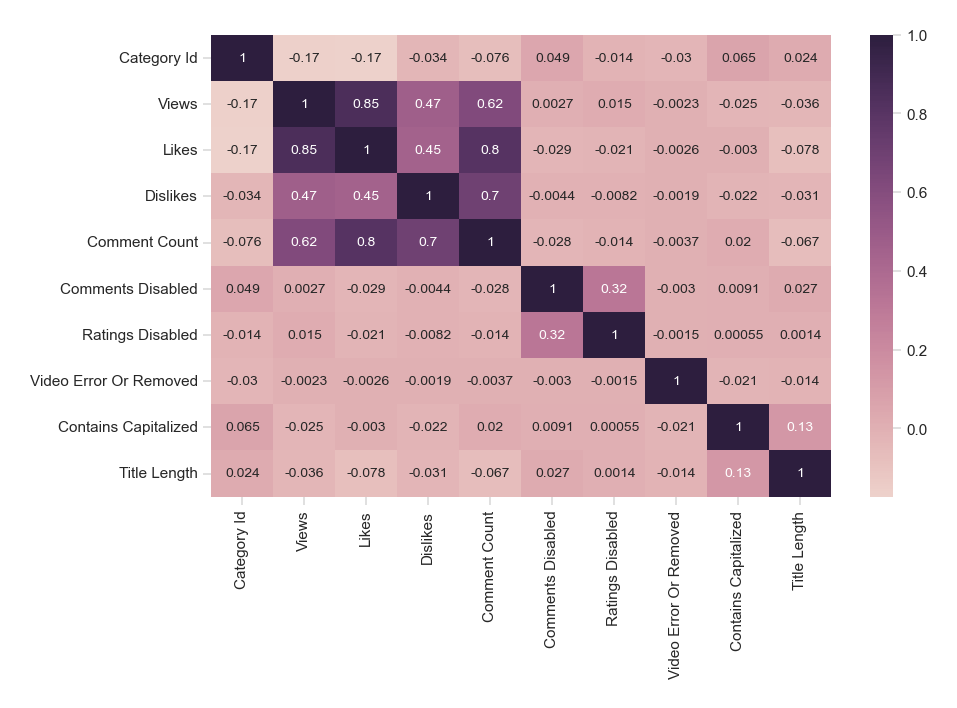

In [27]:
## Plotting heatmap for checking co-relation
h_labels = [x.replace('_', ' ').title() for x in 
            list(df.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(df.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

**The correlation map and correlation table above say that views and likes are highly positively correlated.**

## Most common words in video titles

- Let’s see if some words are used meaningfully in trending video titles. Let’s draw a word cloud for the titles of our trending videos, which is a way to visualize the most common words in the titles; the more common the word, the larger its font-size:

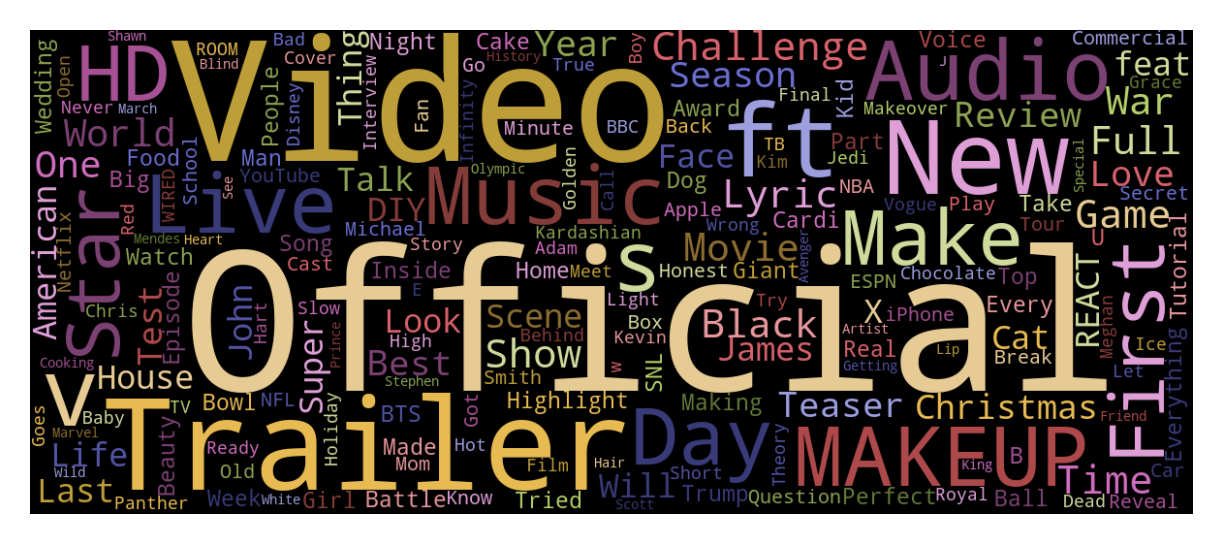

In [36]:
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="black", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

## Which channels have the largest number of trending videos?

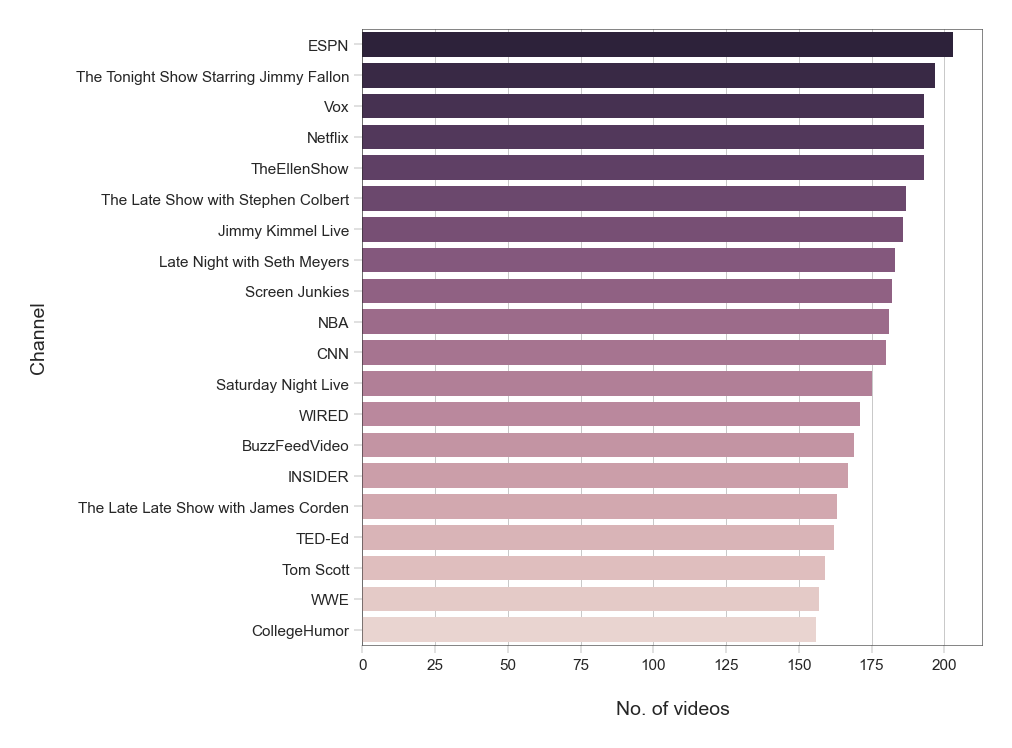

In [37]:
cdf = df.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channel_title", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

## Which video category has the largest number of trending videos?
- First, we will add a column that contains category names based on the values in category_id column. We will use a category JSON file provided with the dataset which contains information about each category.

In [40]:
with open(r"C:\Users\lenovo\Desktop\US_category_id.json") as f:
    categories = json.load(f)["items"]
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
df['category_name'] = df['category_id'].map(cat_dict)

- Now we can see which category had the largest number of trending videos

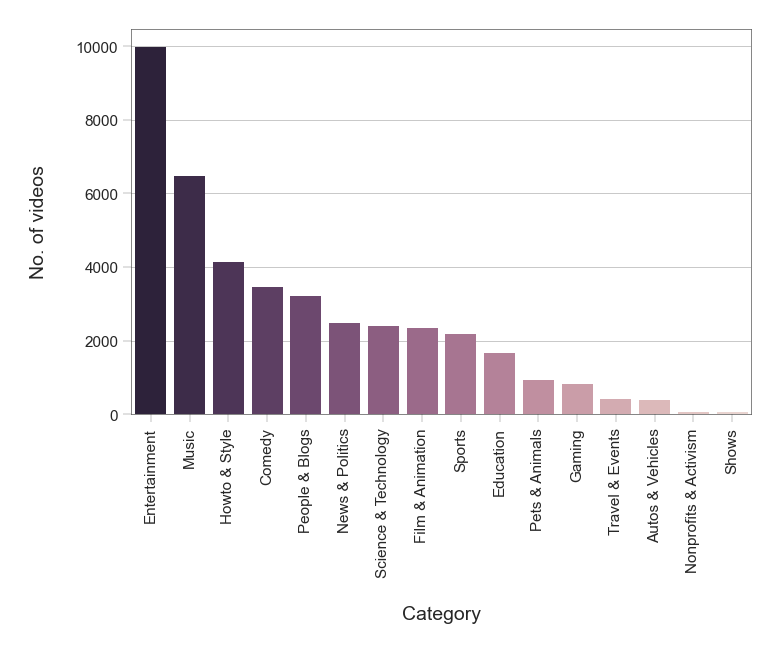

In [41]:
cdf = df["category_name"].value_counts().to_frame().reset_index()
cdf.rename(columns={"index": "category_name", "category_name": "No_of_videos"}, inplace=True)
fig, ax = plt.subplots()
_ = sns.barplot(x="category_name", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=16, reverse=True), ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="No. of videos")

We see that the Entertainment category contains the largest number of trending videos among other categories: around 10,000 videos, followed by Music category with around 6,200 videos, followed by Howto & Style category with around 4,100 videos, and so on.

## Conclusions
Here are the some of the results we extracted from the analysis:

- We analyzed a dataset that contains information about YouTube trending videos for 205 days. The dataset was collected in 2017 and 2018. It contains 40949 video entry.
- 71% of trending videos have less than 1.5 million views, and 91% have less than 5 million views.
- 68% of trending videos have less than 40,000 likes, and 84% have less than 100,000 likes.
- 67% of trending videos have less than 4,000 comments, and 93% have less than 25,000 comments.
- Some videos may appear on the trending videos list on more than one day. Our dataset contains 40494 entries but not for 40494 unique videos but for 6351unique videos.
- Trending videos that have 100,000,000 views and more have title length between 33 and 55 characters approximately.
- The delimiters - and | were common in trending video titles.
- The words 'Official', 'Video', 'Trailer', 'How', and '2018' were common also in trending video titles.
- There is a strong positive correlation between the number of views and the number of likes of trending videos: As one of them increases, the other increases, and vice versa.
- There is a strong positive correlation also between the number of likes and the number of comments, and a slightly weaker one between the number of dislikes and the number of comments.
- The category that has the largest number of trending videos is 'Entertainment' with 9,964 videos, followed by 'Music' category with 6,472 videos, followed by 'Howto & Style' category with 4146 videos.

                       - - - - - - - - X X X X X X X X - - - - - - - - 